# Titanicデータ解析

## データ準備

### ライブラリのインポート

In [1]:
""" ライブラリのインポート
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### データの読み込みと、学習とテストデータの結合

In [2]:
""" 学習データとテストデータの読み込み
"""
train = pd.read_csv('./input/titanic/train.csv')
test = pd.read_csv('./input/titanic/test.csv')

In [3]:
""" データを一度結合
"""
data = pd.concat([train, test], sort=False)

## データ確認

train： 学習用データ  
test： 評価用データ  
data： 学習 + 評価用データ  

### 欠損データの数を確認

In [4]:
print('学習データの全体データ数')
print(len(train))
print('学習データの空データ率')
print(train.isnull().sum()/len(train))

学習データの全体データ数
891
学習データの空データ率
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


### 質データを数値データに変換

In [5]:
""" 性別を男性:0、女性:1に変換
"""
#train['Sex'].fillna(('male'), inplace=True)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1}).astype(int)

""" 乗船地を'S','C','Q'を0,1,2に変換
"""
train['Embarked'].fillna(('S'), inplace=True)
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


### 各変数の相関を確認

生存と性別は関連がある。（女性の生存率が0.54と高い）


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.145894 -0.087759  0.024313  0.042758 -0.081876   
Survived        0.145894  1.000000 -0.037227  0.535727 -0.244604  0.100339   
Pclass         -0.087759 -0.037227  1.000000  0.041725 -0.307590 -0.100324   
Sex             0.024313  0.535727  0.041725  1.000000 -0.172307  0.095344   
Age             0.042758 -0.244604 -0.307590 -0.172307  1.000000 -0.161625   
SibSp          -0.081876  0.100339 -0.100324  0.095344 -0.161625  1.000000   
Parch          -0.050419  0.018723  0.049894  0.081832 -0.274813  0.258993   
Fare            0.029345  0.134019 -0.315069  0.129871 -0.091542  0.285492   
Embarked       -0.053079  0.077178 -0.231167  0.052044  0.079865  0.021653   

                Parch      Fare  Embarked  
PassengerId -0.050419  0.029345 -0.053079  
Survived     0.018723  0.134019  0.077178  
Pclass       0.049894 -0.315069 -0.231167  
Sex          0.081832  0.129871  0.052044  

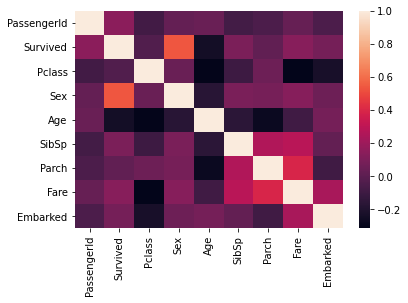

In [6]:
""" 全体ヒートマップ
"""
sns.heatmap(train.dropna().corr())
print(train.dropna().corr())

             PassengerId  Survived    Pclass  Sex       Age     SibSp  \
PassengerId     1.000000 -0.008790 -0.117476  NaN  0.085899  0.000869   
Survived       -0.008790  1.000000 -0.477114  NaN  0.116109 -0.263284   
Pclass         -0.117476 -0.477114  1.000000  NaN -0.386217  0.136263   
Sex                  NaN       NaN       NaN  NaN       NaN       NaN   
Age             0.085899  0.116109 -0.386217  NaN  1.000000 -0.241442   
SibSp           0.000869 -0.263284  0.136263  NaN -0.241442  1.000000   
Parch           0.113805 -0.223644  0.143976  NaN -0.118539  0.295385   
Fare            0.063155  0.218466 -0.634771  NaN  0.171468  0.093852   
Embarked       -0.065345  0.109562  0.112555  NaN -0.029651 -0.178227   

                Parch      Fare  Embarked  
PassengerId  0.113805  0.063155 -0.065345  
Survived    -0.223644  0.218466  0.109562  
Pclass       0.143976 -0.634771  0.112555  
Sex               NaN       NaN       NaN  
Age         -0.118539  0.171468 -0.029651  
SibSp

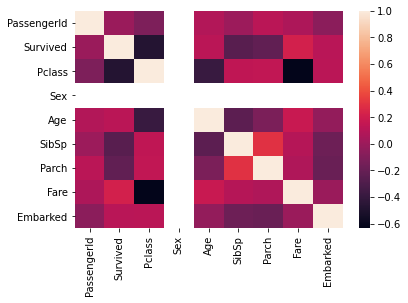

In [7]:
""" 女性のヒートマップ
"""
sns.heatmap(train[train['Sex'] == 1].corr())
print(train[train['Sex'] == 1].corr())

## ここで一度仮説を設定

ここで一度、生存と他のデータとの関係を考える
1. おそらく女性の生存率は高いだろう
2. おそらく子供の生存率は高いだろう
3. おそらく老人の生存率は高いだろう
4. おそらく金持ち（客室の等級が高い）は生存率は高いだろう
5. おそらく単身の男性は生存率が低いだろう
6. 

## 生存者・死亡者比
全データ900に対して、死亡が約550名、生存が約350名程度で、11:7の割合になっている。

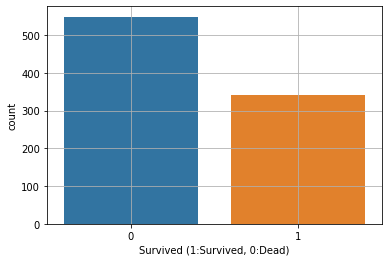

In [8]:
sns.countplot(data=train, x='Survived')
plt.xlabel('Survived (1:Survived, 0:Dead)')
plt.grid(True)

---

## 各パラメータと生死の関係を可視化

### 客室クラス 比較

客室クラスが良いほど優先的に救助はされているが、それほど顕著でもないなぁ （◎仮説1）

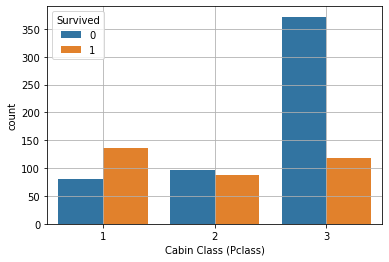

In [9]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.xlabel('Cabin Class (Pclass)')
plt.grid(True)

### 男女数 比較

明らかに女性は優先して救助されている（◎仮説1）

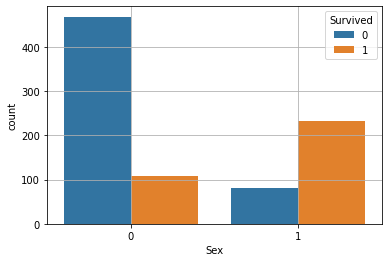

In [10]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.xlabel('Sex')
plt.grid(True)

### 年齢の分布

5歳以下の乳児・幼児は明らかに優先されている。（◎仮説2）  
詳細に分析しないとわからないが、15歳くらいまでは優先されている???  
意外と老人は優先されていない。（✗仮説3）  



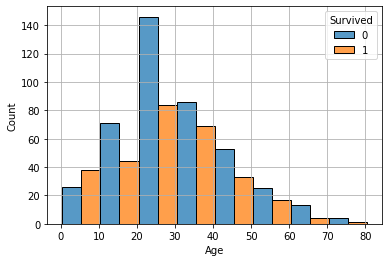

In [11]:
sns.histplot(data=train, x='Age', binwidth=10, hue='Survived', multiple="dodge")
plt.xlabel('Age')
plt.grid(True)

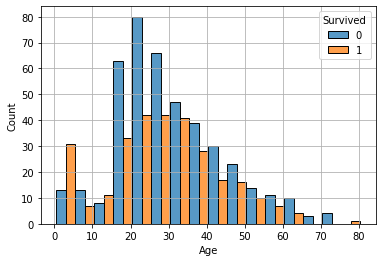

In [12]:
sns.histplot(data=train, x='Age', binwidth=5, hue='Survived', multiple="dodge")
plt.xlabel('Age')
plt.grid(True)

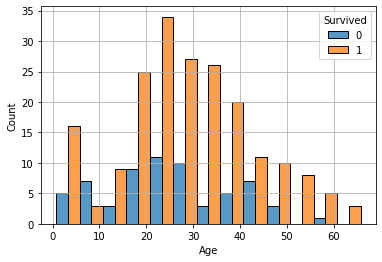

In [13]:
sns.histplot(data=train[train['Sex'] == 1], x='Age', binwidth=5, hue='Survived', multiple="dodge")
plt.xlabel('Age')
plt.grid(True)

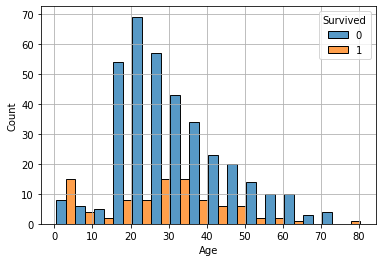

In [14]:
sns.histplot(data=train[train['Sex'] == 0], x='Age', binwidth=5, hue='Survived', multiple="dodge")
plt.xlabel('Age')
plt.grid(True)

### 兄弟、配偶者の数

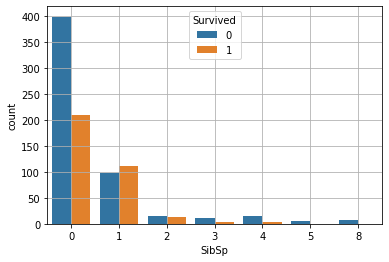

In [15]:
sns.countplot(data=train, x='SibSp', hue='Survived')
plt.xlabel('SibSp')
plt.grid(True)

### 両親、子供の数

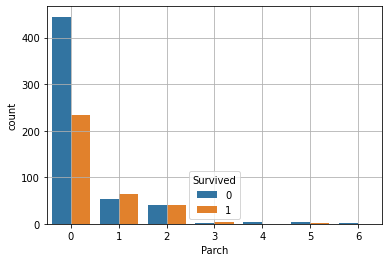

In [16]:
sns.countplot(data=train, x='Parch', hue='Survived')
plt.xlabel('Parch')
plt.grid(True)

### 乗船地 比較

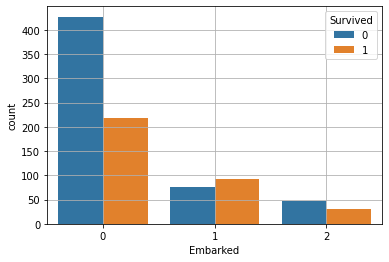

In [17]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.xlabel('Embarked')
plt.grid(True)

### チケット料金 分布

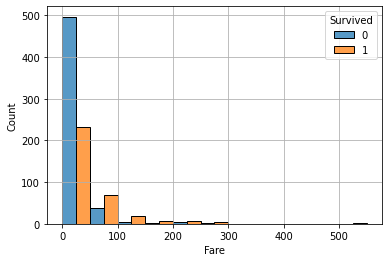

In [18]:
sns.histplot(data=train, x='Fare', binwidth=50, hue='Survived', multiple='dodge')
plt.xlabel('Fare')
plt.grid(True)

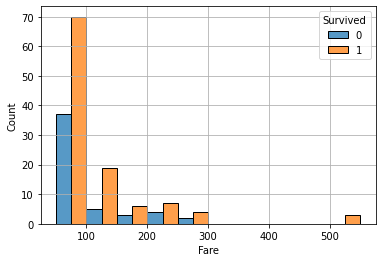

In [19]:
sns.histplot(data=train[train['Fare'] > 50], x='Fare', binwidth=50, hue='Survived', multiple='dodge')
plt.xlabel('Fare')
plt.grid(True)

50ドル以上料金を払っている人は生存率が高い、料金が50ドル以下だと生存率が低い（◎仮説4）

---

### 家族数を作る

In [20]:
data['Fsize'] = data['Parch'] + data['SibSp'] + 1
print(data[data['Fsize'] == 3])

     PassengerId  Survived  Pclass  \
8              9       1.0       3   
10            11       1.0       3   
38            39       0.0       3   
48            49       0.0       3   
65            66       1.0       3   
..           ...       ...     ...   
392         1284       NaN       3   
397         1289       NaN       1   
407         1299       NaN       1   
409         1301       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
38                  Vander Planke, Miss. Augusta Maria  female  18.0      2   
48                                 Samaan, Mr. Youssef    male   NaN      2   
65                            Moubarek, Master. Gerios    male   NaN      1   
..                                                 ...     ...   ... 

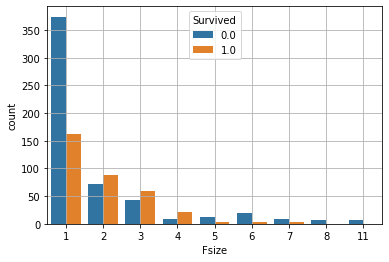

In [21]:
sns.countplot(data=data, x='Fsize', hue='Survived')
plt.xlabel('Fsize')
plt.grid(True)

### 客室クラスと料金の関係を箱ひげ図で表現

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

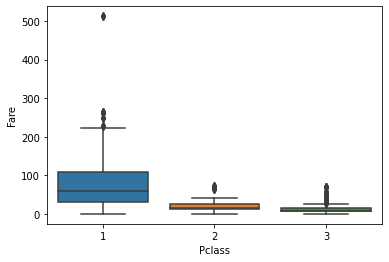

In [22]:
""" 客室クラスと料金の関係を箱ひげ図で表現
"""
sns.boxplot(data=data, x='Pclass', y='Fare')

## 欠損データを補完 データのクリーニング

In [23]:
""" 料金は平均値で補完
"""
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

""" 年齢と客室クラスは相関があるので、クラス毎の平均で補完
"""
data['Age'] = data.groupby('Pclass').transform(lambda d: d.fillna(d.mean()))['Age']

/tmp/ipykernel_504/3195270422.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  data['Age'] = data.groupby('Pclass').transform(lambda d: d.fillna(d.mean()))['Age']
